# **Иследование параметров о выпускающихся играх**

В распоряжение исторические данные о играх из открытых источников. По данным показателям надо определить закономерности, которые определят, что выпускающейся игра успешна. 

Это поможет сделать ставку и спланировать рекламную компанию на 2017 год.

В нашем распоряжении данные до 2016 года включительно:
- name — название игры
- platform — платформа
- year_of_Release — год выпуска
- genre — жанр игры
- na_sales — продажи в Северной Америке (миллионы проданных копий)
- eu_sales — продажи в Европе (миллионы проданных копий)
- jp_sales — продажи в Японии (миллионы проданных копий)
- other_sales — продажи в других странах (миллионы проданных копий)
- critic_Score — оценка критиков (максимум 100)
- user_Score — оценка пользователей (максимум 10)
- rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг  компьютерных игр и присваивает им подходящую возрастную категорию.


In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import statistics as sts
from scipy import stats as st
import seaborn as sbn

## Изучение данных 


In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Предобработка данных

### Изменение названий колонок

In [4]:
data = data.rename(columns = {
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'year_of_release',
    'Genre':'genre',
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating',
    
})

In [5]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование типов данных в столбцах

In [6]:
print('Типы данных в столбцах:\n', data.dtypes)
print('\n Количество пропусков в каждом столбце:\n', data.isna().sum())
data.head()

Типы данных в столбцах:
 name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

 Количество пропусков в каждом столбце:
 name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Тип данных нужно изменить в столбцах:
- year_of_release (год выпуска игры) - всегда целый (тип int)
- critic_score	(оценка критика) - всегда целая (тип int)
- user_score (оценка пользователя) - вещественная (тип float)

Посмотрим уникальные значения данных столбцов, чтобы понять можем ли мы сейчас поменять тип. 

In [7]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [8]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Тип данных менять сейчас не имеет смысла, т.к. есть значения NaN.

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Тип данные не поменять, пока есть 'tbd'.

### Обработка пропусков

Необходимо посмотреть количество пропусков в каждом столбце

In [10]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

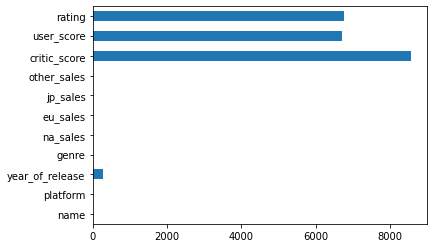

In [11]:
data.isna().sum().plot(kind='barh');

In [12]:
def isna_view (df):
    return  (
                (df.isna().mean()*100)
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns = {0:'percent_space'})
                .style.background_gradient('coolwarm').format("{:.1f}")
            )

isna_view (data)

,percent_space
critic_score,51.3
rating,40.5
user_score,40.1
year_of_release,1.6
name,0.0
genre,0.0
platform,0.0
na_sales,0.0
eu_sales,0.0
jp_sales,0.0


Много пропусков в столбцах:
- critic_score (оценка критиков (максимум 100))
- user_score (оценка пользователей)
- rating  (рейтинг от организации ESRB)

В первую очередь, обработаем пропуски в столбцах:
- name
- genre

**Рассмотрим, столбец 'name':**

In [13]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строки, где пропуски в столбце 'name' не несут особой значимости. 
Т.к. эти игры выпускались в 1993 году (что довольно поздно), они не имею названия и жанра, а также оценок критиков и пользователей.  


In [14]:
data = data.loc[~(data['name'].isna())]

In [15]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

**Рассмотрим столбец 'year_of_release' (год выпуска)**

In [16]:
data.loc[data['year_of_release'].isna(), 'name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

Для некоторых игр год пропущен только в некоторых случаях, а в других строчках он есть. 

In [17]:
data.loc[data['name']=="Madden NFL 2004"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Если, год выпуска у игры на разных платформах один, то я заполню пропуски для таких игр годом, который указан в остальных строчках для данной игры.
Также при заполнении буду проверять не выходит ли год из диапазона существования платформы. 

In [18]:
# жизненный срок платформы

years_of_life = data.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

,min,max,years_of_life
platform,,,
2600,1980.0,1989.0,9.0
3DO,1994.0,1995.0,1.0
3DS,2011.0,2016.0,5.0
DC,1998.0,2008.0,10.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
GBA,2000.0,2007.0,7.0
GC,2001.0,2007.0,6.0
GEN,1990.0,1994.0,4.0


In [19]:
for j in data.loc[data['year_of_release'].isna(), 'name'].unique():
    for i in data.loc[(data['name'] == j)&(data['year_of_release'].isna()), 'platform'].unique():
        #Проверка, на всех ли других платформах один год выпуска игры
        if (len(data.loc[(data['name'] == j)&(~(data['year_of_release'].isna())), 'year_of_release'].unique().tolist()) ==1):
            #Проверка входит ли новый год в диапазон существования платформы
            if (data.loc[(data['name'] == j)&(~(data['year_of_release'].isna())), 'year_of_release'].unique().tolist()>= (data.loc[data['platform'] == i, 'year_of_release'].min()))& (data.loc[(data['name'] == j)&(~(data['year_of_release'].isna())), 'year_of_release'].unique().tolist()<= (data.loc[data['platform'] == i, 'year_of_release'].max())): 
                data.loc[(data['name'] == j)&(data['platform'] == i)&(data['year_of_release'].isna()), 'year_of_release'] = data.loc[(data['name'] == j)&(~(data['year_of_release'].isna())), 'year_of_release'].unique().tolist()[0]

Остальные пропуски заполним средним значением по платформам. 

In [20]:
for i in data.loc[data['year_of_release'].isna(), 'platform'].unique():
    data.loc[(data['platform'] == i)&(data['year_of_release'].isna()), 'year_of_release'] = data.loc[(data['platform'] == i)&(~(data['year_of_release'].isna())), 'year_of_release'].median()

In [21]:
# жизненный срок платформы

years_of_life = data.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

# years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
2600,1980.0,1989.0,9.0
3DO,1994.0,1995.0,1.0
3DS,2011.0,2016.0,5.0
DC,1998.0,2008.0,10.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
GBA,2000.0,2007.0,7.0
GC,2001.0,2007.0,6.0
GEN,1990.0,1994.0,4.0


In [22]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Теперь все пропуски в столбце 'year_of_release' заполнены корректно. 

Изменим тип данных в этом столбце на целый.

In [23]:
data['year_of_release'] = data['year_of_release'].astype('int')

**Рассмотрим, столбцы 'critic_score' (оценка критиков) и 'user_score' (оценка пользователей) .**

Причина возможных пропусков в этом столбце:
- критик не дал оценку
- он дал оценку игре только на 1 платформе
- данные не подгрулись 

In [24]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Мы видим, что чаще всего пропуски идут сразу в 3-х столбцах одновременно:
- critic_score (оценка критиков (максимум 100))
- user_score (оценка пользователей (максимум 10))
- rating (рейтинг от организации ESRB )

In [25]:
data.loc[(data['critic_score'].isna()&(data['user_score'].isna())&(data['rating'].isna()))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим, уникальные значения этих столбцов. А также посмотрим какое распределение у оценок. 

Для этого создадим 5 категорий для классификации оценок критика:
- 0-20 (очень плохой рейтинг)
- 20-40 (плохой рейтинг)
- 30-60 (средний рейтинг)
- 60-80 (хороший рейтинг)
- 80-100 (отличный рейтинг)
- 'NaN'

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
NaN                     8576
хороший рейтинг         4293
отличный рейтинг        1775
средний рейтинг         1759
плохой рейтинг           299
очень плохой рейтинг      11
Name: critic_score, dtype: int64


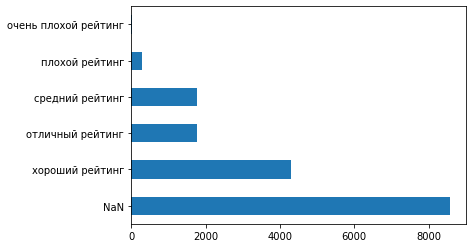

In [26]:
print(data['critic_score'].unique())

def class_critec_score(row):
    if row <= 20:
        return ('очень плохой рейтинг')
    elif 20 < row <= 40:
        return('плохой рейтинг')
    elif 40 < row <= 60:
        return('средний рейтинг')
    elif 60 < row <= 80:
        return('хороший рейтинг')
    elif 80 < row <= 100:
        return('отличный рейтинг')
    else:
        return ('NaN')
    
       
        
print(data['critic_score'].apply(class_critec_score).value_counts())
data['critic_score'].apply(class_critec_score).value_counts().plot(kind = 'barh');


И 6 категорий для классификации оценок пользователя:
- 0-2 (очень плохой рейтинг)
- 2-4 (плохой рейтинг)
- 3-6 (средний рейтинг)
- 6-8 (хороший рейтинг)
- 8-10 (отличный рейтинг)
- tbd

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
NaN                     6699
хороший рейтинг         3775
tbd                     2424
отличный рейтинг        2298
средний рейтинг         1144
плохой рейтинг           313
очень плохой рейтинг      60
Name: user_score, dtype: int64


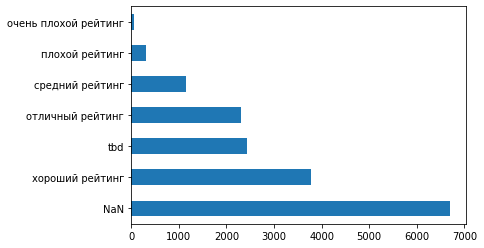

In [27]:
def class_user_score(row):
    if row =='tbd':
        return 'tbd'
    row = float(row)
    if row <= 2:
        return ('очень плохой рейтинг')
    elif 2 < row <= 4:
        return('плохой рейтинг')
    elif 4 < row <= 6:
        return('средний рейтинг')
    elif 6< row <= 8:
        return('хороший рейтинг')
    elif 8 < row <= 10:
        return('отличный рейтинг')
    else:
        return ('NaN')


print(data['user_score'].unique())
print(data['user_score'].apply(class_user_score).value_counts())
data['user_score'].apply(class_user_score).value_counts().plot(kind='barh');

Количество пропусков в данных колонках очень большое. 
Как правило пропуски проиходят сразу в 3-х колонках, скорее всего, данные игры не заинтересовали людей и критиков. 
Заполнять пропуски в данных колонках не будем.


Мы видим, что в столбце 'user_score' есть оценка tbd. Надо понять, что это значит.

In [28]:
data.loc[(data['user_score']=='tbd')].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


tbd = to be determined - это значения, которые будут определены позднее. В нашем случае мы заменим их на значения NaN.

In [29]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

**Рассмотрим столбце 'rating' (рейтинг от организации ESRB)**

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64


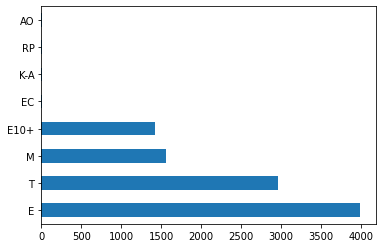

In [30]:
print(data['rating'].value_counts());
data['rating'].value_counts().plot(kind = 'barh');

В этом столбце хранятся категориальные переменные, следовательно, пропуски в этом столбце нужно заполнить. Для этого попрубуем определить от чего будет зависить данный рейтинг. 

В интернете данные аббревеатуры расшифровываются: 
- EC («Early childhood») - «Для детей младшего возраста» (от 3 лет)
- E («Everyone») — «Для всех»  (от 6 лет)
- E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
- T («Teen») — «Подросткам»
- M («Mature») — «Для взрослых»
- AO («Adults Only 18+») — «Только для взрослых»
- RP («Rating Pending») — «Рейтинг ожидается»:
- K-A ("Kids to Adults")— «Для всех»  (от 6 лет) (данная аббревиатура использовалась до появления Е)


В нашем случае большинство игр категории Е, т.е. для всех. На втором месте игры для подростков, а на 3-м игры для взрослых.



Заменим категорию К-А на Е. (это новое название данной категории)

Также категорию АО объединим с М, т.к. все это относится к категории "Для взрослых"

In [31]:
data.loc[data['rating'] == 'K-A', 'rating']='E'
data.loc[data['rating'] == 'AO', 'rating']='M'

In [32]:
for i in data.loc[:6, 'name'].unique():
    print(data.loc[data['name'] == i, ['name', 'platform', 'rating']])
    print()

         name platform rating
0  Wii Sports      Wii      E

                  name platform rating
1    Super Mario Bros.      NES    NaN
201  Super Mario Bros.       GB    NaN

             name platform rating
2  Mario Kart Wii      Wii      E

                name platform rating
3  Wii Sports Resort      Wii      E

                       name platform rating
4  Pokemon Red/Pokemon Blue       GB    NaN

       name platform rating
5    Tetris       GB    NaN
157  Tetris      NES    NaN

                    name platform rating
6  New Super Mario Bros.       DS      E



Наблюдаем, что у одной игры может не стоять рейтинг на какой-то платформе, но при этом стоять на остальных.
В таком случае заполним такие пропуски рейтингом из других платформ. 

In [33]:
for i in data['name'].unique():
    if (len(data.loc[(data['name'] == i)&(~(data['rating'].isna())), 'rating'].unique().tolist())) == 1:
        data.loc[(data['name'] == i)&(data['rating'].isna()),'rating'] = data.loc[(data['name'] == i)&(~(data['rating'].isna())), 'rating'].unique().tolist()[0]

In [34]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6348
dtype: int64

Пропусков в данном столбце стало чуть меньше. 

Для остальных пропусков мы введем переменную:unknown.

In [35]:
data.loc[data['rating'].isna(), 'rating'] ='unkmown'

In [36]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

### Подсчет суммарных продаж во всех регионах

In [37]:
data['sum_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales'] +data['other_sales']

In [38]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  sum_sales        16713 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 2.1+ MB


## Исследовательский анализ

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

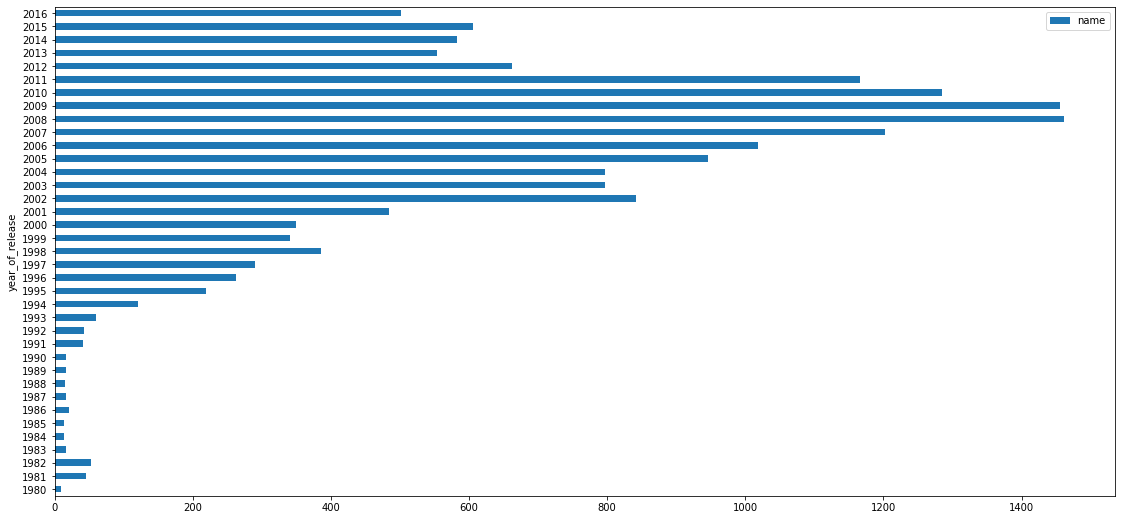

In [39]:
data.pivot_table(index = 'year_of_release', values ='name', aggfunc='count').plot(kind='barh', figsize=(19,9));

Мы видим, что большинство игр выпускалось в 2008-2009 году.
Чтобы спрогнозировать продажи на следующий год нам нужны данные за последние года.

Данные до 2000 года будут скорее только мешать, т.к. тогда выпускалось очень мало игр. С того времени прошло уже очень много времени, следовательно, использовать ту информацию не совсем актуально.


### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

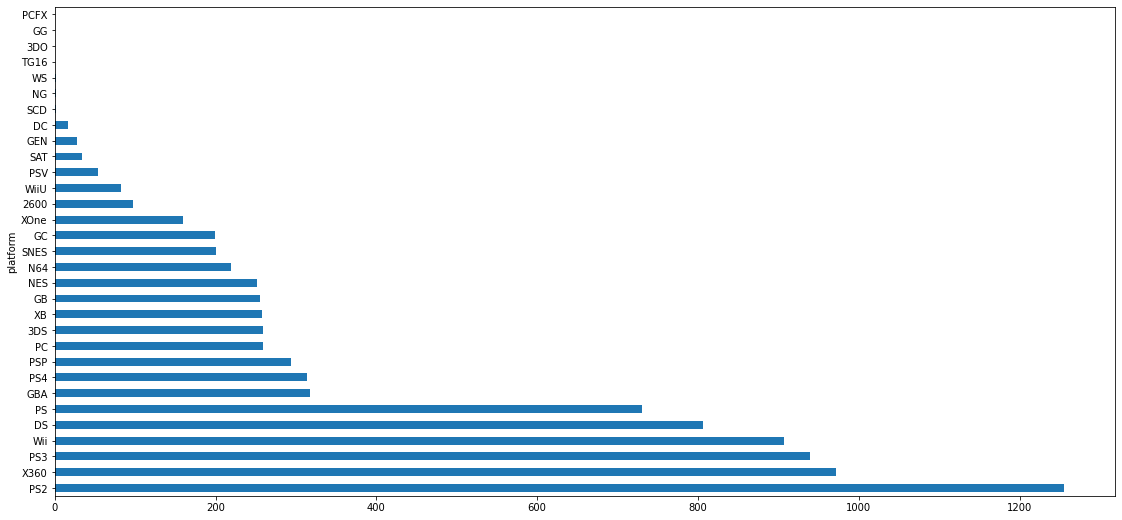

In [40]:
data.groupby('platform')['sum_sales'].sum().sort_values(ascending = False).plot(kind='barh', figsize=(19,9));

Мы видим, что наибольшии сумарные продажи у 6 команий: PS2, X360, Wii, PS3, DS, PS (свыше 500 млн)

У 12 компаний средние суммарные продажи:
GBA, PS4, PSP, XB, GB, NES, 3DS, PC, N64, SNES, GC, XOne (менее 500 и выше 100)

У остальных очень низкие.

Построим для платформ с наибольшей суммой продаж распределение по годам. 

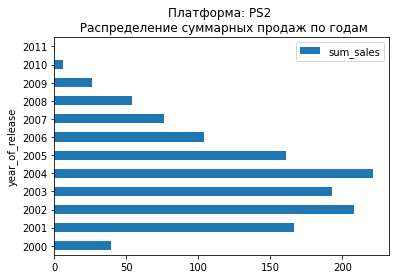

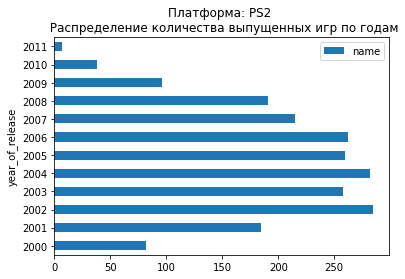

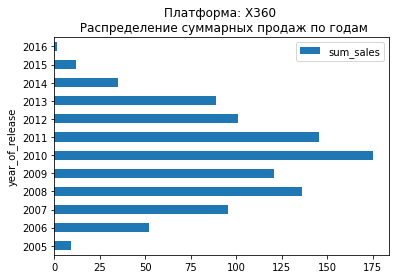

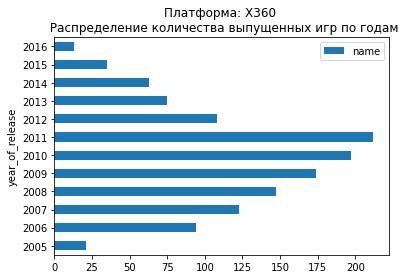

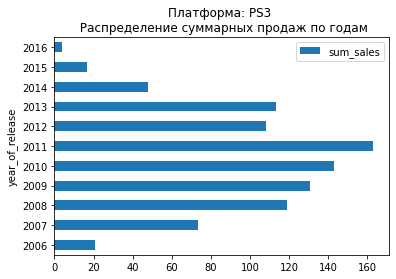

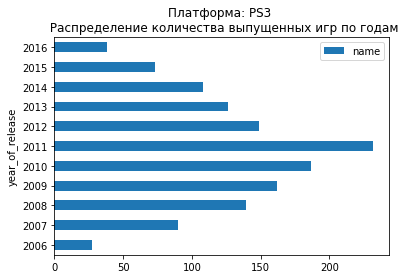

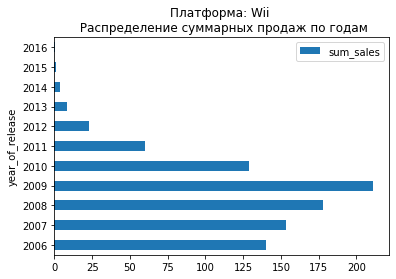

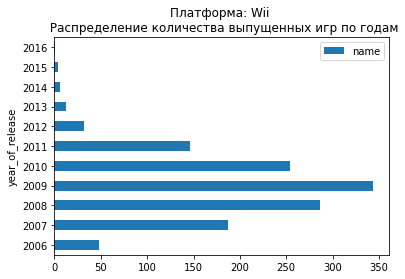

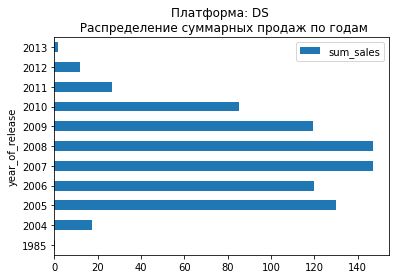

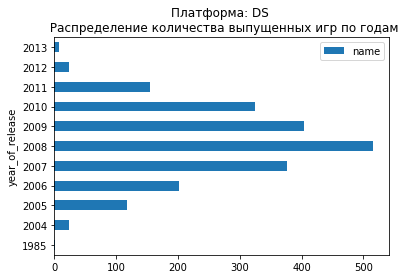

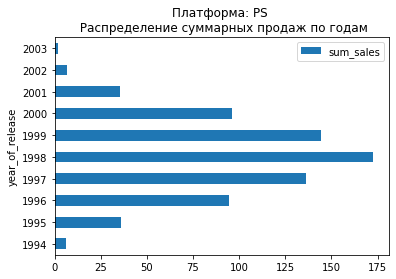

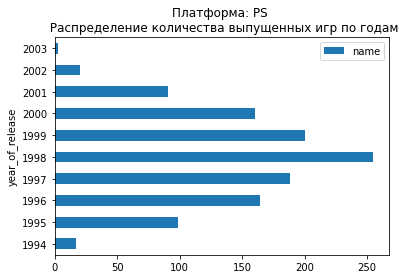

In [41]:
sum_sales_table = data.groupby('platform')['sum_sales'].sum().sort_values( ascending = False)

for i in  sum_sales_table[sum_sales_table>=500].index:
      data.loc[(data['platform'] == i), ['sum_sales','year_of_release']].groupby('year_of_release').sum().plot(kind ='barh', title =f'Платформа: {i} \n Распределение суммарных продаж по годам', )
      data.loc[(data['platform'] == i), ['name','year_of_release']].groupby('year_of_release').count().plot( kind ='barh', title = f'Платформа: {i} \n Распределение количества выпущенных игр по годам');

- Платформа: PS2 (2000-2011).
  Наибольшее количество игр выпустила в 2002-2004 году.
  Наибольшее количество игр продала в 2002-2006 году.

- Платформа: X360 (2005-2016).
  Наибольшее количество игр выпустила в 2010-2011 году.
  Наибольшее количество игр продала в 2010-2011 году.

- Платформа: Wii (2006-2016).
  Наибольшее количество игр выпустила в 2009 году.
  Наибольшее количество игр продала в 2009 году.

- Платформа: PS3 (2006-2016).
  Наибольшее количество игр выпустила в 2011 году.
  Наибольшее количество игр продала в 2011 году.

- Платформа: DS (1985-2013).
  Наибольшее количество игр выпустила в 2008 году.
  Наибольшее количество игр продала в 2008-2009 году.

- Платформа: PS (1994-2003).
  Наибольшее количество игр выпустила в 1998 году.
  Наибольшее количество игр продала в 1998 году.




У платформы DS есть выброс в 1985 году. 

In [42]:
data.loc[(data['platform'] == 'DS')&(data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unkmown,0.02


Эта игра принесла очень мало прибыли, следовательно, она не несет большой ценности в нашем анализе. Такой выброс может повлиzть в отрицательную сторону, поэтому мы удалим данную строчку. 

In [43]:
data = data.loc[~((data['platform'] == 'DS')&(data['year_of_release'] == 1985))]

Мы видим, что каждая платформа выпускала игры в определенный период времени.

Сначала каждая платформа увеличивала свои обороты, выпускала все больше игр, следовательно, и увеличила свой доход.В какой-то момент достигала пика по доходу, а дальше и обороты и доход платформы шли на спад. 

В среднем почти каждая платформа функционировала около 10 лет. 

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Каждая платформа функционировала в среднем около 10 лет. 
Для прогнозирования стоит взять 2014-2016 год. 
Мы увидим по этим годам, какие платформы набирают обороты и будут для нас выгодны для использования в 2017 году


### Не учитывайте в работе данные за предыдущие годы.

In [44]:
data = data.loc[(2014 <= data['year_of_release'] )&(2016 >= data['year_of_release'])]

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [45]:
print('Прибыль платформ, которые выпускали игры в 2014 -2016:')
print(data.loc[:, ['name', 'platform', 'sum_sales']]\
      .groupby('platform').sum().sort_values(by = 'sum_sales', ascending = False))


Прибыль платформ, которые выпускали игры в 2014 -2016:
          sum_sales
platform           
PS4          288.15
XOne         140.36
3DS           86.68
PS3           68.18
X360          48.22
WiiU          42.98
PC            27.05
PSV           22.66
Wii            5.07
PSP            0.36


Конечно, данные за 2016 у нас не полные. Но мы можем посмотреть платформы, которые в целом выпускали игры за последние 2 года . Выведем для этих платформ распределение по годам.

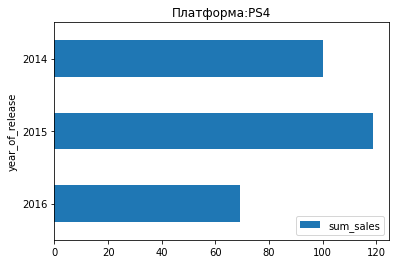

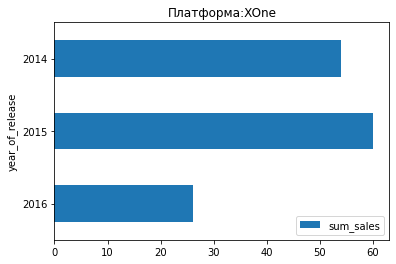

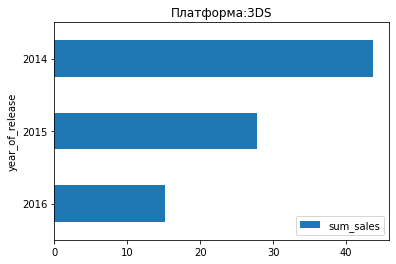

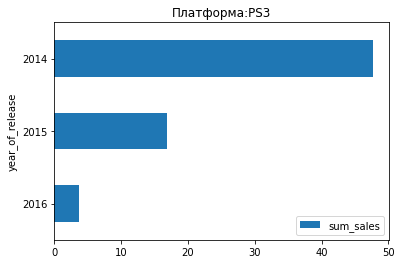

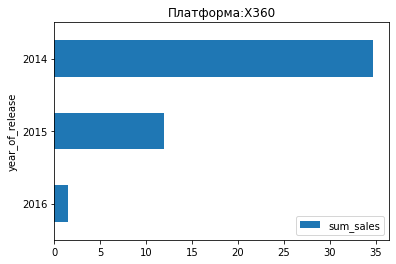

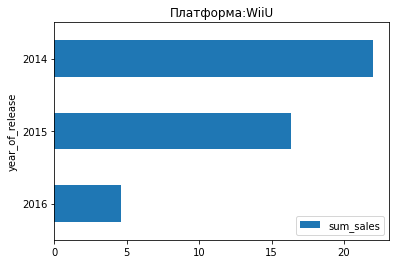

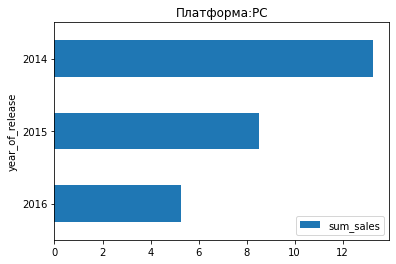

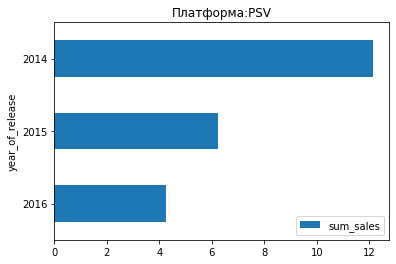

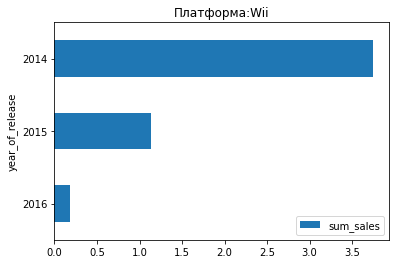

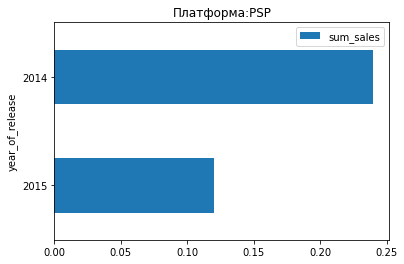

In [46]:
for i in  data.loc[:, ['name', 'platform', 'sum_sales']].groupby('platform').sum().\
                                                                sort_values(by = 'sum_sales', ascending = False).index:
    data.loc[data['platform'] == i, ['platform','year_of_release', 'sum_sales']]\
    .groupby('year_of_release').sum().sort_values(by = 'year_of_release', ascending = False)\
    .plot(kind='barh', title = f'Платформа:{i}')


Почти все платформы, которые выпускают игры в 2016 году испытывают снижение прибыли в последние годы. 

На данный момент по продажам лидируют платформы PS4 и XONe. По графикам они только начинают набирать популярность, следовательно, дальше их показатели могут только расти.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [47]:
data_top = data.loc[:, ['platform', 'sum_sales','year_of_release']].reset_index()

In [48]:
data_top

,index,platform,sum_sales,year_of_release
0,31,PS4,14.63,2015
1,42,PS4,12.62,2014
2,47,3DS,11.68,2014
3,77,PS4,8.58,2015
4,87,PS4,7.98,2015
...,...,...,...,...
1685,16703,PSV,0.01,2016
1686,16707,PSV,0.01,2014
1687,16710,PS3,0.01,2016
1688,16712,PSV,0.01,2016


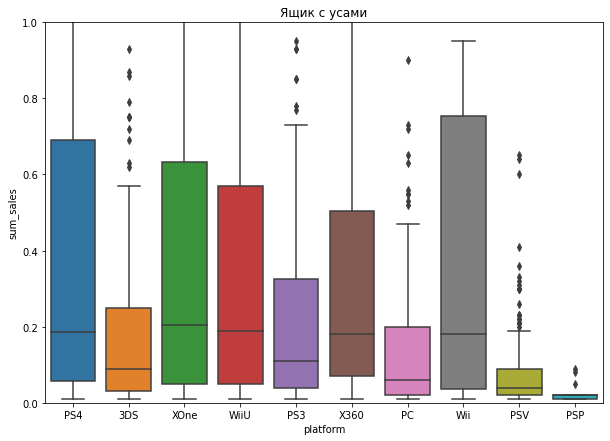

In [49]:
plt.figure(figsize=(10, 7))
plt.ylim(0,1)
sbn.boxplot(x=data_top['platform'], y=data_top['sum_sales'], data=data_top, );
plt.title('Ящик с усами');

По данной диаграмме мы можем сказать, что:
- больше всего выбросов у платформ: PS4, XOne, 3DS, PS3, X360. Это значит, что на данных платформах было много игр, которые принесли большую прибыль. Но по предыдущим графикам мы видим, что платформы 3DS, PS3, X360 в 2016 году уже не пользуется спросом, следовательно, ставки на них лучше не ставить. 
- наибольшее медианное значение имеют платформы: PS4, XOne, WiiU,  X360, Wii. Это значит, что на этих платформах доход с одной игры наибольший и примерно равный между этими платформами. 


### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Одная из популярных на данное время платформ: PS4

In [50]:
print('Платформа: PS4 ')
print(display(data.loc[data['platform'] == 'PS4'].pivot_table(index='year_of_release', aggfunc={'sum_sales':'sum', 'critic_score':'mean', 'user_score':'mean'})))

Платформа: PS4 


,critic_score,sum_sales,user_score
year_of_release,,,
2014,73.134615,100.00,6.740385
2015,72.137931,118.90,6.826966
2016,71.673469,69.25,6.874257


None


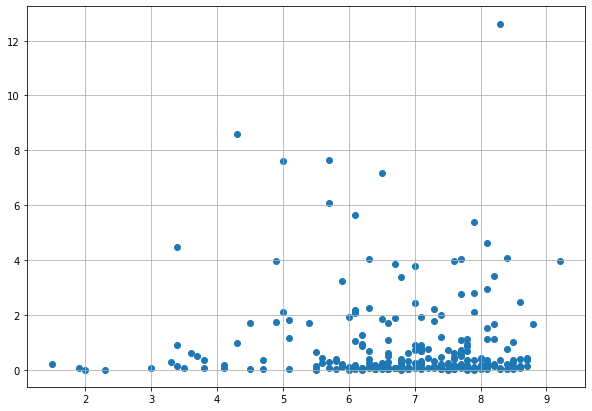

In [51]:
plt.figure(figsize=(10,7))
plt.grid(True)
plt.scatter(x = data.loc[data['platform'] == 'PS4', ['user_score']], y = data.loc[data['platform'] == 'PS4', ['sum_sales']]);

Мы видим, что зависимость прибыли ели заметная, но она есть. Как правило, чем выше рейтинг, тем выше прибыль платформы.  
Посчитаем корреляцию:

In [52]:
print('Платформа: PS4')
print('Коэффициент корреляции Пирсона: ')
print(round(data.loc[data['platform'] == 'PS4']['sum_sales'].corr(data.loc[data['platform'] == 'PS4']['critic_score']), 2))

Платформа: PS4
Коэффициент корреляции Пирсона: 
0.4


Это значит, что прямая зависимость прибыли от оценки критика есть, но очень слабая.

In [53]:
print('Платформа: PS4')
print('Коэффициент корреляции Пирсона: ')
print(round(data.loc[data['platform'] == 'PS4']['sum_sales'].corr(data.loc[data['platform'] == 'PS4']['user_score']), 2))


Платформа: PS4
Коэффициент корреляции Пирсона: 
-0.04


Данный коэффициент корреляции показывает, что в данном случае есть очень и очень слабая обратная зависимость прибыли от зрительской оценки. Коэффициент приближен к 0, поэтому можно сказать, что влияния почти нет. 

### Соотнесите выводы с продажами игр на других платформах

Возьмем платформы с высокой прибылью, которые выпускают игры в 2014-2016 годах.

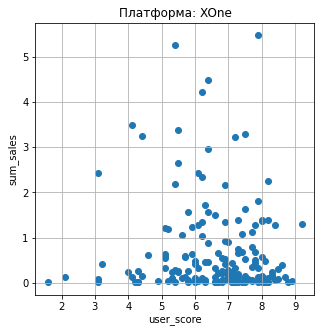

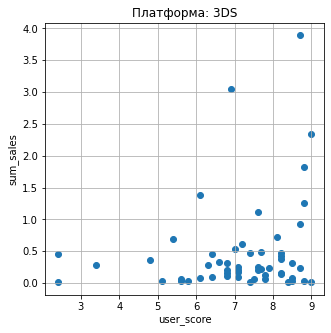

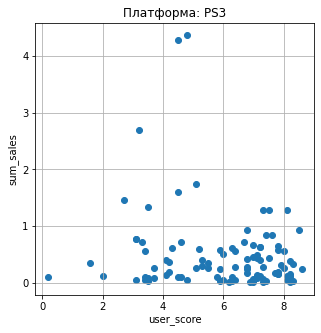

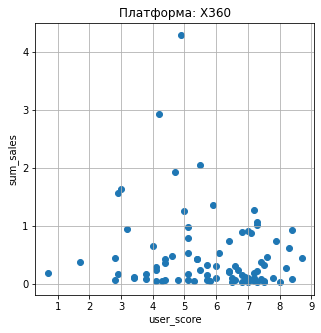

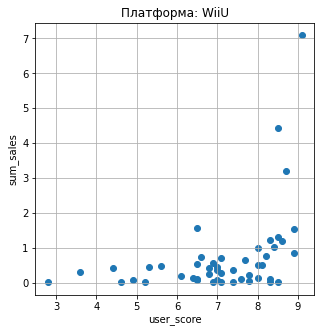

In [54]:
for i in data.loc[:,  ['name', 'platform', 'sum_sales']].groupby('platform').sum().sort_values(by = 'sum_sales', ascending = False)[1:6].index:
    plt.figure(figsize=(5,5))
    plt.grid(True)
    plt.title(f'Платформа: {i}')
    plt.xlabel('user_score')
    plt.ylabel('sum_sales')
    plt.scatter(x = data.loc[data['platform'] == i, ['user_score']], y = data.loc[data['platform'] == i, ['sum_sales']]);
    

Зависимость на всех платформах очень и очень слабая. 
Посчитаем корреляцию:

In [55]:
for i in data.loc[:, ['name', 'platform', 'sum_sales']].groupby('platform').sum().sort_values(by = 'sum_sales', ascending = False)[1:6].index:
    print('Платформа:', i)
    print('Коэффициент корреляции Пирсона: ', \
         round(data.loc[data['platform'] == i]['sum_sales'].corr(data.loc[data['platform'] == i]['critic_score']), 2), '\n')
    


Платформа: XOne
Коэффициент корреляции Пирсона:  0.43 

Платформа: 3DS
Коэффициент корреляции Пирсона:  0.31 

Платформа: PS3
Коэффициент корреляции Пирсона:  0.45 

Платформа: X360
Коэффициент корреляции Пирсона:  0.53 

Платформа: WiiU
Коэффициент корреляции Пирсона:  0.37 



Мы видим, что на всех платформах зависимость дохода от оценки критика очень слабая. 

In [56]:
for i in data.loc[:,  ['name', 'platform', 'sum_sales']].groupby('platform').sum().sort_values(by = 'sum_sales', ascending = False)[1:6].index:
    print('Платформа:', i)
    print('Коэффициент корреляции Пирсона: ', round(data.loc[data['platform'] == i]['sum_sales'].corr(data.loc[data['platform'] == i]['critic_score']), 2), '\n')

Платформа: XOne
Коэффициент корреляции Пирсона:  0.43 

Платформа: 3DS
Коэффициент корреляции Пирсона:  0.31 

Платформа: PS3
Коэффициент корреляции Пирсона:  0.45 

Платформа: X360
Коэффициент корреляции Пирсона:  0.53 

Платформа: WiiU
Коэффициент корреляции Пирсона:  0.37 



Тут тенденция сохраняется. 

Получаем, что чем выше оценка критиков и зрителей, тем выше прибыль с продажи игры на платформе, но данная зависимость не сильная. Поэтому доход с игры  далеко не всегда будет зависеть от этих показателей. 


### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [57]:
data.pivot_table(index=['genre',], values=['sum_sales','name'], aggfunc={'sum_sales':'sum','name':'count'} ).sort_values(by='sum_sales', ascending =False)

,name,sum_sales
genre,,
Action,619,199.36
Shooter,128,170.94
Sports,161,109.48
Role-Playing,222,101.70
Misc,113,37.55
Fighting,60,28.22
Racing,69,27.52
Platform,38,18.09
Adventure,185,17.55


Наиболее прибыльные жанры: экшн, спорт, шутер.

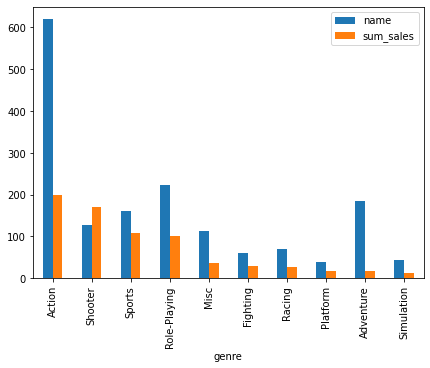

In [58]:
data.pivot_table(index=['genre'], values=['sum_sales', 'name'], \
                 aggfunc={'sum_sales':'sum','name':'count'}).sort_values(by='sum_sales', ascending =False)\
                .head(10).plot(kind ='bar', figsize = (7,5));

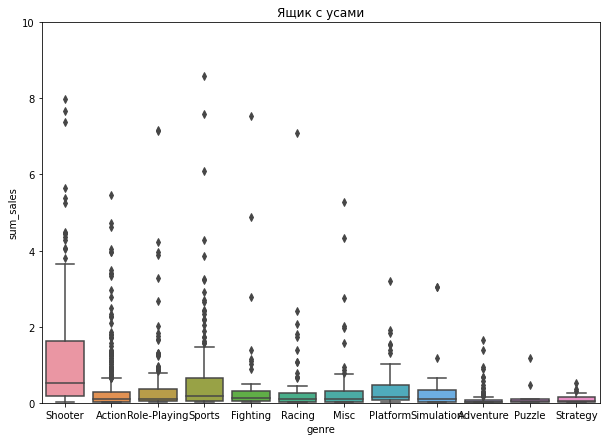

In [59]:
plt.figure(figsize=(10, 7))
plt.ylim(0,10)
sbn.boxplot(x=data['genre'], y=data['sum_sales'], data=data );
plt.title('Ящик с усами');

По диаграмме видно, что большое количество выбросов имеют жанры:
- Action
- Sports
- Shooter
- Role-Playing
Это значит, что игры данных жанров часто приносят большую прибыль. 

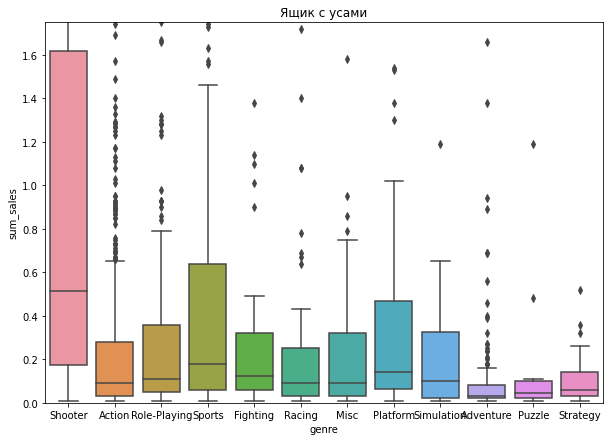

In [60]:
plt.figure(figsize=(10, 7))
plt.ylim(0,1.75)
sbn.boxplot(x=data['genre'], y=data['sum_sales'], data=data );
plt.title('Ящик с усами');

Наибольшие медианное значение у жанра:
- Shooter

Получается, что игры данного жанра в среднем приносят больше прибыли, чем остальные.

Также высоские медианные значения у Sports, Platform, Flighting. Получается, что игры на данных платфорах приносят прибыль больше, чем на остальных. 

## Составьте портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP):
 #### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [61]:
region_name = ['na_sales', 'eu_sales', 'jp_sales']

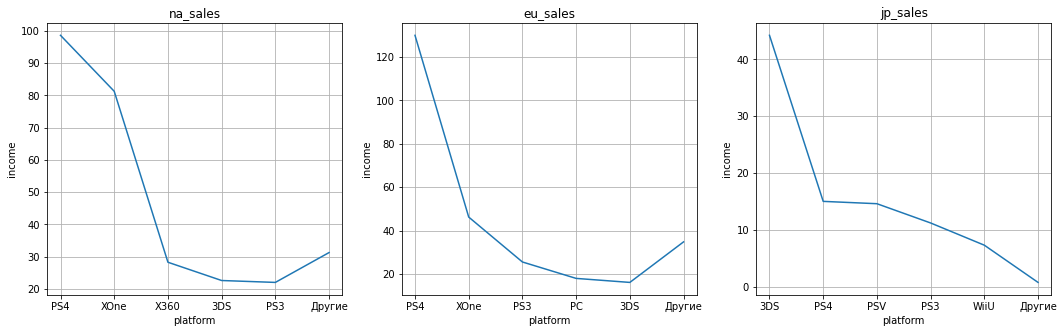

In [62]:
plt.figure(figsize=(18, 5))
plt.title('Самые популярные платформы')
for i in range(len(region_name)):
    plt.subplot(1, 3, i+1 )
    new_table = data.groupby('platform')[region_name[i]].sum().sort_values(ascending = False)[:5]
    new_table['Другие']= data.groupby('platform')[region_name[i]].sum().sort_values(ascending = False)[5:].sum()
    plt.xlabel('platform')
    plt.ylabel('income')
    plt.plot(new_table)
    plt.title(region_name[i])
    plt.grid()

В Северной Америки и Европе лидирует платформа: PS4

А в Японии: 3DS


#### Самые популярные жанры (топ-5). Поясните разницу.

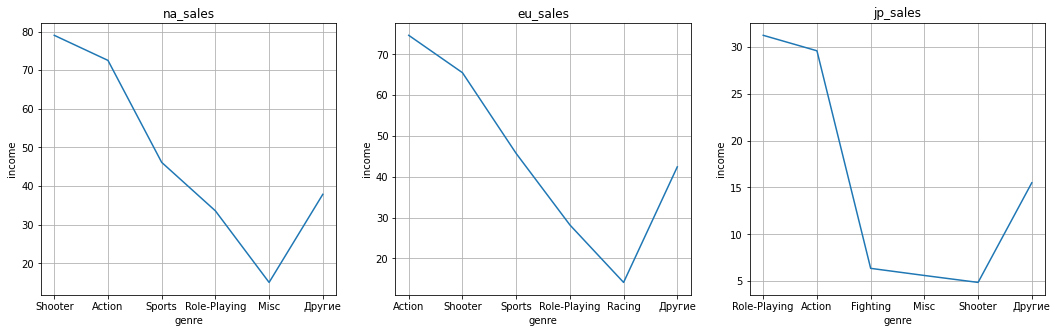

In [63]:
plt.figure(figsize = (18, 5))
for i in range(len(region_name)):
    plt.subplot(1, 3, i+1 )
    new_table = data.groupby('genre')[region_name[i]].sum().sort_values(ascending = False)[:5]
    new_table['Другие']= data.groupby('genre')[region_name[i]].sum().sort_values(ascending = False)[5:].sum()
    plt.xlabel('genre')
    plt.ylabel('income')
    plt.plot(new_table)
    plt.title(region_name[i])
    plt.grid()

- В Европе лидирует по продажам жанр Action (экшн)
- В Северной Америки  - Shooter
- А в Японии  - Role-Playing (Ролевые игры)

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

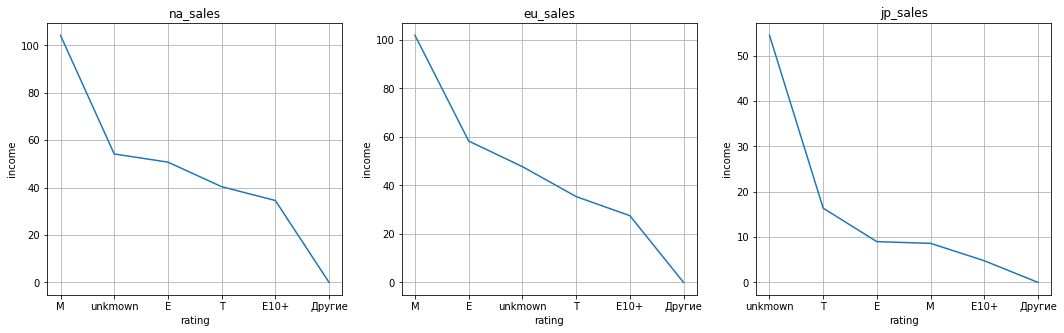

In [64]:
plt.figure(figsize = (18, 5))
for i in range(len(region_name)):
    plt.subplot(1, 3, i+1 )
    new_table = data.groupby('rating')[region_name[i]].sum().sort_values(ascending = False)[:5]
    new_table['Другие']= data.groupby('rating')[region_name[i]].sum().sort_values(ascending = False)[5:].sum()
    plt.xlabel('rating')
    plt.ylabel('income')
    plt.plot(new_table)
    plt.title(region_name[i])
    plt.grid()

В Европе и Северной Америке больше всего популярны игры с рейтингом - M.

А в Японии - unknown, т.е. те игры, чей рейтинг мы не знаем. 

## Проверьте гипотезы


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Нулевая гипотеза:** Средние генеральных совокупности пользовательский 
рейтингов для платформ Xbox One  и PC равны.

**Альтернативная гипотеза:**Средние генеральных совокупности пользовательский рейтингов для платформ Xbox One  и PC не  равны.

**Проверяем гипотезы о равенстве среднего двух генеральных совокупностей**
    

In [65]:
data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Для проверки этих гипотез. 

In [66]:
sample_1 = data.loc[(data['platform'] == 'XOne')&(~(data['user_score'].isna())),'user_score'].values
sample_2 = data.loc[(data['platform'] == 'PC')&(~(data['user_score'].isna())),'user_score'].values

results = st.ttest_ind(sample_1, sample_2, equal_var = False)
print('p-значение:', results.pvalue)

alpha = .05

if (results.pvalue) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


In [67]:
# check
data[data['platform'] == 'XOne']['year_of_release'].unique(), \
data[data['platform'] == 'PC']['year_of_release'].unique()


(array([2015, 2014, 2016]), array([2014, 2015, 2016]))

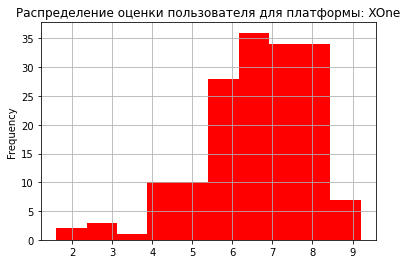

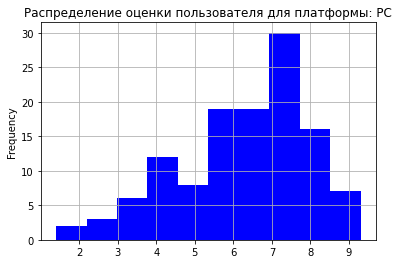

In [68]:
data.loc[data['platform'] == 'XOne','user_score'].plot( kind ='hist',grid = True, color = 'red', title = 'Распределение оценки пользователя для платформы: XOne');
plt.show()
data.loc[data['platform'] == 'PC','user_score'].plot( kind ='hist',grid = True,color = 'blue',  title = 'Распределение оценки пользователя для платформы: PC');

### Cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Нулевая гипотеза:** Средние генеральных совокупности пользовательский 
рейтингов для жанров Action и Sports равны.

**Альтернативная гипотеза:**Средние генеральных совокупности пользовательский рейтингов для платформ Action и Sports равны не  равны.

**Проверяем гипотезы о равенстве среднего двух генеральных совокупностей**
    

In [69]:
array_1 = data.loc[(data['genre'] == 'Action')&(~(data['user_score'].isna())),'user_score'].values
array_2 = data.loc[(data['genre'] == 'Sports')&(~(data['user_score'].isna())),'user_score'].values

results = st.ttest_ind(sample_1, sample_2, equal_var = False)
print('p-значение:', results.pvalue)

alpha = .05

if (results.pvalue) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


## Вывод

Благодаря нашему анализу, мы выяснили, что будет влиять на успешность игры. 

- Платформы, которые набирают популярность: PS4  и XOne. 
  На данных платформах много выбросов в диаграмме размаха, следовательно, много игр, которые принесли большую прибыль.
  Также медианное значение прибыли на данных платформах довольно высокое, что еще раз нам показывает о будущем успехе этих платформ.

- Оценки пользователей и критиков оказывают прямое влияние на доход с продажи игры. Но данное влияние, как правило, не сильное. 

- Жанры, которые часто приносят очень большую прибыль из-за успешности игр: Action, Sports, Shooter, Role-Playing.
  При этом игры жанра Shooter имеют высокие средние показатели, следовательно, такие игры, в среднем, принесут больше денег, чем остальные. 

Если рассматривать по регионам, то получается:
- В Европе: 
        Популярная платформа - PS4 
        Популярный жанр - action 
        Популярный рейтинг  - M (для взрослых)
        
- В Северной Америке:  
        Популярная платформа - PS4
        Популярный жанр - Shooter
        Популярный рейтинг  -  M (для взрослых)

- В Японии:
        Популярная платформа - 3DS
        Популярный жанр - Role-Playing
        Популярный рейтинг  - T (для подростков)
     